In [1]:
import sys
sys.path.append("../src")
import pandas as pd



In [2]:
from vnstock import Listing
list = Listing(source='vci')
VN30 = list.symbols_by_group('VN30').tolist()

In [3]:
tickers = [t for t in VN30]
#tickers = ['ACB', 'VIC', 'HPG']
day_range = 520


In [4]:
from fetch_info import fetch_stock
panel = fetch_stock(tickers, hist=day_range, combine = False)
panel

Fetching ACB...
Done!

Fetching BCM...
Done!

Fetching BID...
Done!

Fetching CTG...
Done!

Fetching DGC...
Done!

Fetching FPT...
Done!

Fetching GAS...
Done!

Fetching GVR...
Done!

Fetching HDB...
Done!

Fetching HPG...
Done!

Fetching LPB...
Done!

Fetching MBB...
Done!

Fetching MSN...
Done!

Fetching MWG...
Done!

Fetching PLX...
Done!

Fetching SAB...
Done!

Fetching SHB...
Done!

Fetching SSB...
Done!

Fetching SSI...
Done!

Fetching STB...
Done!

Fetching TCB...
Done!

Fetching TPB...
Done!

Fetching VCB...
Done!

Fetching VHM...
Done!

Fetching VIB...
Done!

Fetching VIC...
Done!

Fetching VJC...
Done!

Fetching VNM...
Done!

Fetching VPB...
Done!

Fetching VRE...
Done!



{'ACB':           time   open   high    low  close   volume
 0   2024-07-05  20.18  20.30  20.05  20.30  6357111
 1   2024-07-08  20.30  20.34  20.14  20.26  4959392
 2   2024-07-09  20.18  20.39  20.09  20.30  8004908
 3   2024-07-10  20.47  20.47  20.26  20.26  6484698
 4   2024-07-11  20.34  20.34  20.18  20.18  5001133
 ..         ...    ...    ...    ...    ...      ...
 369 2025-12-24  24.15  24.45  23.95  24.30  8709200
 370 2025-12-25  24.30  24.60  24.00  24.00  7250600
 371 2025-12-26  23.90  24.05  23.65  23.90  7831900
 372 2025-12-29  23.85  24.10  23.80  24.00  3770400
 373 2025-12-30  24.00  24.20  23.90  24.15  5143600
 
 [374 rows x 6 columns],
 'BCM':           time   open   high    low  close   volume
 0   2024-07-05  62.55  63.04  62.25  63.04   451485
 1   2024-07-08  63.04  64.42  63.04  63.63  1254319
 2   2024-07-09  64.03  66.09  64.03  65.70  1680141
 3   2024-07-10  65.80  65.80  64.32  64.32   756999
 4   2024-07-11  65.01  65.11  63.73  63.73   604247
 ..  

In [5]:
parent = []
for t in panel:
    stock = panel[t]
    stock['ret'] = (stock['close'].pct_change())
    stock['ticker'] = t
    parent.append(stock[['time','ticker', 'close', 'ret']])

sharpe_panel = pd.concat(parent)
sharpe_panel

,time,ticker,close,ret
0,2024-07-05,ACB,20.30,NaN
1,2024-07-08,ACB,20.26,-0.001970
2,2024-07-09,ACB,20.30,0.001974
3,2024-07-10,ACB,20.26,-0.001970
4,2024-07-11,ACB,20.18,-0.003949
...,...,...,...,...
369,2025-12-24,VRE,34.65,0.011679
370,2025-12-25,VRE,32.25,-0.069264
371,2025-12-26,VRE,32.00,-0.007752
372,2025-12-29,VRE,33.20,0.037500


In [6]:
summary_panel = sharpe_panel.groupby('ticker')['ret'].agg(['mean','std', 'var'])
summary_panel['sharpe'] = summary_panel['mean']/summary_panel['std']
summary_panel.sort_values('sharpe', ascending=False)

,mean,std,var,sharpe
ticker,,,,
VIC,0.005851,0.026268,0.000690,0.222753
VHM,0.003333,0.025294,0.000640,0.131774
STB,0.002024,0.020497,0.000420,0.098764
SHB,0.001885,0.019332,0.000374,0.097521
VJC,0.002078,0.021400,0.000458,0.097114
MBB,0.001528,0.017193,0.000296,0.088902
HDB,0.001822,0.020585,0.000424,0.088494
CTG,0.001372,0.016548,0.000274,0.082913
LPB,0.001494,0.019437,0.000378,0.076885


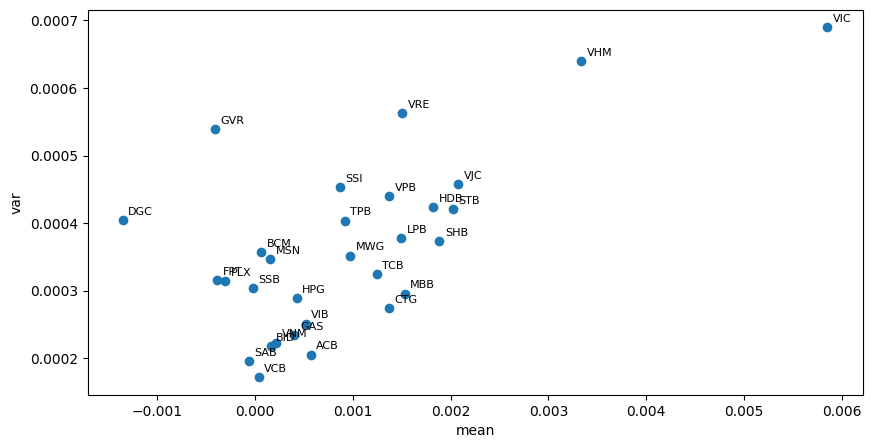

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(summary_panel["mean"], summary_panel["var"])

for x, y, label in zip(summary_panel["mean"], summary_panel["var"], summary_panel.index):
    plt.annotate(label, (x, y), xytext=(4, 4), textcoords="offset points", fontsize=8)

plt.xlabel("mean")
plt.ylabel("var")
plt.show()

In [8]:
import itertools

combos = itertools.combinations(VN30, 3)

In [9]:
from IPython.display import clear_output    
from mpt import mpt_sim 
import sys
final = []
for combo in combos:
    clear_output(wait=True)
    print(f"Simulating combo: {combo}")    
    panel = sharpe_panel[sharpe_panel['ticker'].isin(combo)]
    out = mpt_sim(panel, 1000)
    final.append(out)

Simulating combo: ('VNM', 'VPB', 'VRE')
Index(['VNM', 'VPB', 'VRE'], dtype='object', name='ticker')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
fin = pd.concat(final)
top = fin.sort_values(['Return', 'Volatility'], ascending=[False, True]).head(1000)
fin['sharpe'] = fin['Return'] / fin['Volatility']
#plt.scatter(each['Volatility'], each['Return'])

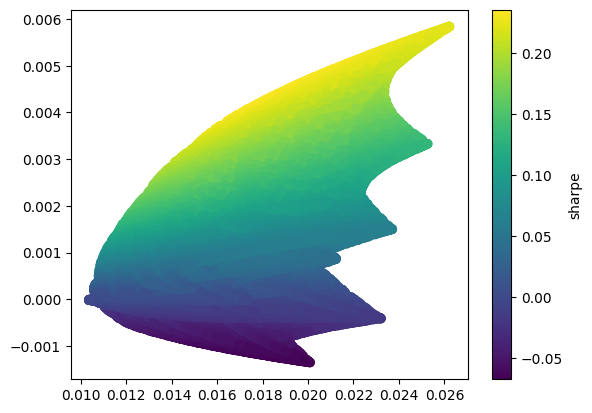

In [11]:
plt.scatter(fin['Volatility'], fin['Return'], c=fin['sharpe'])
plt.colorbar(label='sharpe')
